# Lab 2.2_1

## Ques 1

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/anantagarwal/Desktop/AI&ML Lab/Lab_2/student+performance/student/student-mat.csv',sep=';') 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
XY = df.iloc[:, -2:]

## Ques 2

In [23]:
print("Statistical values of XY:")
print(XY.describe())

Statistical values of XY:
               G2          G3
count  395.000000  395.000000
mean    10.713924   10.415190
std      3.761505    4.581443
min      0.000000    0.000000
25%      9.000000    8.000000
50%     11.000000   11.000000
75%     13.000000   14.000000
max     19.000000   20.000000


## Ques 3


In [28]:
X = XY.iloc[:, 0].values.reshape(-1, 1) 
Y = XY.iloc[:, 1].values.reshape(-1, 1) 

## Ques 4

In [31]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (395, 1)
Shape of Y: (395, 1)


## Ques 5

In [34]:
print("Some rows from XY:")
print(XY.head())

Some rows from XY:
   G2  G3
0   6   6
1   5   6
2   8  10
3  14  15
4  10  10


## Ques 6

In [39]:
def linear_regression(X, Y):
    # X is independent variable, Y is dependent variable
    n = len(X)
    
    # Calculate mean of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    # Calculate the cross-deviation and deviation about X
    SS_xy = np.sum(Y * X) - n * mean_Y * mean_X
    SS_xx = np.sum(X * X) - n * mean_X * mean_X
    
    # Calculate regression coefficients
    m = SS_xy / SS_xx
    c = mean_Y - m * mean_X
    
    return m, c


In [41]:
m, c = linear_regression(X, Y)

In [43]:
print(f"Coefficient (m): {m}")
print(f"Intercept (c): {c}")

Coefficient (m): 1.1021123562440616
Intercept (c): -1.3927582066452366


In [45]:
Y_predicted = m * X + c

In [47]:
def mean_squared_error(Y, Y_predicted):
    return np.mean((Y - Y_predicted) ** 2)

In [49]:
mse = mean_squared_error(Y, Y_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.7939813144442645


In [51]:
def root_mean_squared_error(Y, Y_predicted):
    return np.sqrt(mean_squared_error(Y, Y_predicted))

In [53]:
rmse = root_mean_squared_error(Y, Y_predicted)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.947814496928356


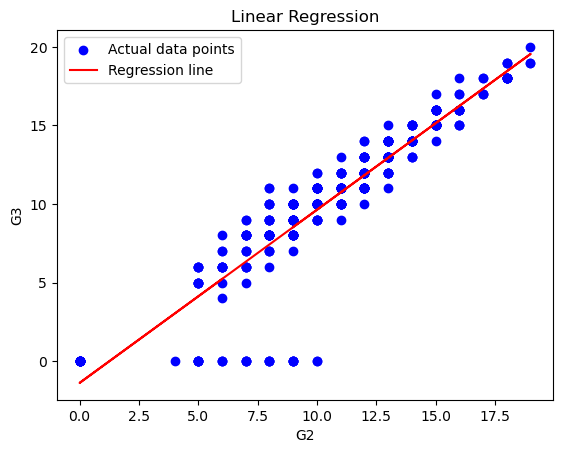

In [55]:
plt.scatter(X, Y, color='blue', label='Actual data points')
plt.plot(X, Y_predicted, color='red', label='Regression line')
plt.xlabel('G2')
plt.ylabel('G3')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [57]:
random_G2 = np.array([15, 20, 30]).reshape(-1, 1)
predicted_G3 = m * random_G2 + c
print(f"Predicted G3 for random G2 values {random_G2.flatten()}: {predicted_G3.flatten()}")

Predicted G3 for random G2 values [15 20 30]: [15.13892714 20.64948892 31.67061248]
